# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [2]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import time

Scitani dat, jak hlasovali jednotlive strany

In [ ]:
clubs = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Celkem'] 
columns = ['Poslancu', 'Ano', 'Ne', 'Neprihlasen', 'Zdrzel', 'Omluven']
first_page = 68900
last_page = 73902
for num in range(first_page, last_page):
    url = 'https://www.psp.cz/sqw/hlasy.sqw?g=' + str(num) + '=cz' 
    cur_page = requests.get(url)
    beat_soup = BeautifulSoup(cur_page.content.decode('windows-1250'), 'html.parser')
    
    page_title = beat_soup.find(class_="page-title-x")
    if page_title is None:
        continue
    meet_description = page_title.get_text() + '\n'
    
    dfs = pd.read_html(url, flavor='html5lib')
    if len(dfs)<2:
        continue
    dfs[1] = dfs[1].drop(['Klub'], axis = 1)
    dfs[1].columns = columns
    
    if dfs[1].index.size == 11:
        dfs[1] = dfs[1].drop([9])
    dfs[1].index = clubs
    
    file = open("dist_votes.csv", "a")
    file.write(meet_description)
    file.close()
    
    dfs[1].to_csv('dist_votes.csv', mode = 'a', index = 'false', encoding='utf-8')
    
    time.sleep(1)

Scitani dat, jak hlasovali jednotlive poslanci

In [ ]:
clubs = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Nezarazeno'] 
first_page = 67018
last_page = 73902
id=0
for num in range(first_page, last_page):
    url = "https://www.psp.cz/sqw/hlasy.sqw?g=" + str(num) + "=cz"
    cur_page = requests.get(url)
    beaut_soup = BeautifulSoup(cur_page.content.decode('windows-1250'), 'html.parser')
    page_title = beaut_soup.find(class_="page-title-x")
    if page_title is None:
        continue
    meet_description = page_title.get_text() + '\n'
    
    iterator = iter(clubs)
    data = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas'])
    all_lists = beaut_soup.find_all(class_="results")
    for my_list in all_lists:
        list_of_members = my_list.select("li")
        if list_of_members:
            club = next(iterator)
        for member in list_of_members:
            
            text = member.get_text()
            data = data.append({'id_hlasovani': id, 'Jmeno' : text[2:], 'Strana' : club, 'Hlas' : text[0]}, ignore_index = 'True')
            
    
    if id==0:
        data.to_csv('members.csv', mode = 'a', index = False, header=True, encoding='utf-8')
    else:
        data.to_csv('members.csv', mode = 'a', index = False, header=False, encoding='utf-8')
    id=id+1
    time.sleep(1)

Odchody a přeběhnutí poslanců mezi jednotlivými stranami.

,Jmeno,Z,Do
0,Jiří Hlavatý,ANO,Nepritomen
1,Jaroslava Pokorná Jermanová,ANO,Nepritomen
2,Martin Půta,STAN,Nepritomen
3,Eva Matyášová,Nepritomen,ANO
4,Milan Pour,Nepritomen,ANO
5,Petr Pávek,Nepritomen,STAN
6,Bohuslav Sobotka,ČSSD,Nepritomen
7,Roman Sklenák,Nepritomen,ČSSD
8,Robert Pelikán,ANO,Nepritomen
9,Monika Červíčková,Nepritomen,ANO


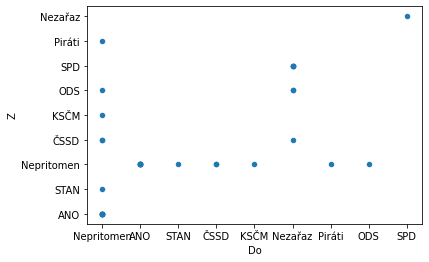

In [14]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Nezarazeno'] 
df_result = pd.DataFrame(columns=['Jmeno', 'Z', 'Do']) 
all_data = pd.read_csv('members.csv', engine='python')
for i in range(6878):
    data1 = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas']) 
    data2 = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas'])
    data1 = all_data.head(i * 200 + 200).tail(200) 
    data2 = all_data.head((i + 1) * 200 + 200).tail(200) 
#     data1 = data1.drop(['Unnamed: 0'], axis=1)
#     data2 = data2.drop(['Unnamed: 0'], axis=1)
    data1.index = data1.Jmeno
    data2.index = data2.Jmeno
    for row in data1.index:
        if row in data2.index:
            if data1.loc[row, 'Strana'] != data2.loc[row, 'Strana']:
                df_result = df_result.append({'Jmeno': row, 'Z': data1.loc[row, 'Strana'], 'Do': data2.loc[row, 'Strana']}, ignore_index='True')
        else:
            df_result = df_result.append({'Jmeno': row, 'Z': data1.loc[row, 'Strana'], 'Do': 'Nepritomen'}, ignore_index='True')
    for row in data2.index:
        if (row not in data1.index):
            df_result = df_result.append(
                {'Jmeno': row, 'Z': 'Nepritomen', 'Do': data2.loc[row, 'Strana']}, ignore_index='True')

display(df_result)
df_result.plot.scatter(x='Do', y='Z');

Dochazka jednotlivych stran

,Dochazka
ANO,0.828752
ODS,0.789656
Pirati,0.861462
SPD,0.791122
CSSD,0.677558
KSCM,0.802684
KDU-CSL,0.753700
TOP09,0.678006
STAN,0.740854
Nezarazeno,0.796702


(0.1, 1.0)

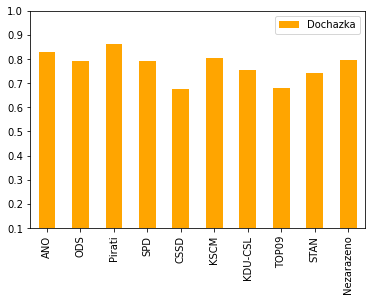

In [15]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Nezarazeno'] 
num = 1
dataDoch = {}
all_data = pd.read_csv('dist_votes.csv', engine = 'python', skiprows = 1, encoding='utf-8')
for i in range(6879):
    data = all_data.head(i * 12 + 10).tail(10)
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.astype('int32')
    data.insert(6, 'Dochazka', 0)
    data.loc[:, 'Dochazka'] =  1 -((data.Omluven + data.Neprihlasen) / data.Poslancu)
    if (i == 0):
        dataDoch = data.loc[:, ['Dochazka']]
    else: 
        dataDoch.loc[:, 'Dochazka'] = (dataDoch.Dochazka * num + data.Dochazka) / (num+1) 
        num += 1
display(dataDoch)        
dataDoch.plot.bar(color='Orange')
plt.ylim(0.1, 1)

Dochazka jednotlivych poslancu a s tim docházka stran jako celek

,Dochazka,Pocet,Strana
Věra Adámková,0.876436,6879.0,ANO
Andrej Babiš,0.245821,6879.0,ANO
Andrea Babišová,0.746329,6879.0,ANO
Margita Balaštíková,0.754906,6879.0,ANO
Josef Bělica,0.831371,6879.0,ANO
...,...,...,...
Václav Votava,0.611552,4415.0,ČSSD
František Navrkal,0.752948,3392.0,Piráti
Ondřej Babka,0.986675,3152.0,ANO
Petr Bendl,0.749683,3152.0,ODS


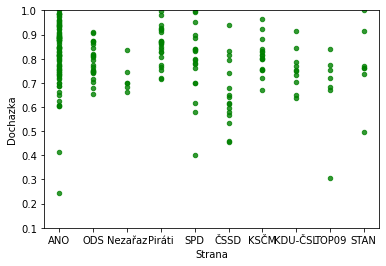

In [31]:
result_data = pd.DataFrame(columns=['Dochazka', 'Pocet', 'Strana'])
all_data = pd.read_csv('members.csv', engine = 'python')
for i in range(6879):
    data = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas'])
    data = all_data.head(i * 200 + 200).tail(200)
    data.index = data.Jmeno
    data = data.drop(['Jmeno'], axis = 1)
    for member in data.index:
        if (data.loc[member, 'Hlas'] == 'A' or data.loc[member, 'Hlas'] == 'N' or data.loc[member, 'Hlas'] == 'Z'):
            attend = 1
        else:
            attend = 0
        if (member in result_data.index):
            result_data.loc[member, 'Pocet'] += 1
            number = result_data.loc[member, 'Pocet']
            result_data.loc[member, 'Dochazka'] = (result_data.loc[member, 'Dochazka'] * (number - 1) + attend) / number
        else:
            newRow = pd.Series({'Dochazka': attend, 'Pocet': 1, }, name=member)
            result_data = result_data.append(newRow)
        result_data.loc[member, 'Strana'] = data.loc[member, 'Strana']
display(result_data)

result_data.plot(x='Strana', y='Dochazka', kind='scatter', color='Green', alpha=0.8)
plt.ylim(0.1, 1)

plt.show()

In [ ]:
Poslanci s nejvetsi dohazkou

<AxesSubplot:title={'center':'Poslanci s nejvetsi dochazkou'}>

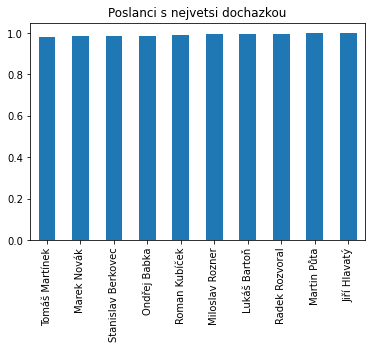

In [32]:
result_data = result_data.sort_values(['Dochazka'])
plt.title('Poslanci s nejvetsi dochazkou')
result_data.Dochazka.tail(10).plot.bar(x='Jmeno', y='Dochazka')

In [ ]:
Poslanci s nejmensi dohazkou

<AxesSubplot:title={'center':'Poslanci s nejmensi dochazkou'}>

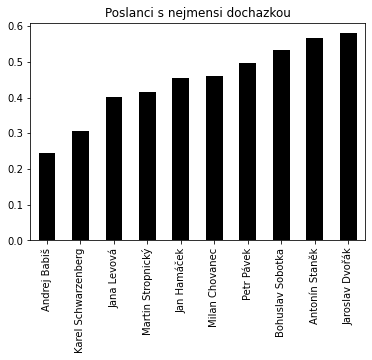

In [33]:
# result_data = result_data.sort_values(['Dochazka'])
plt.title('Poslanci s nejmensi dochazkou')
result_data.Dochazka.head(10).plot.bar(x='Jmeno', y='Dochazka', color = 'Black')

In [ ]:
Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně

<AxesSubplot:>

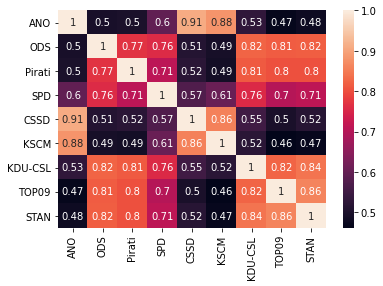

In [34]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Celkem']
number = 1
result_data = {}
all_data = pd.read_csv('dist_votes.csv', engine = 'python', skiprows = 1, encoding='utf-8')
for i in range(6879):
    data = all_data.head(i * 12 + 10).tail(10)
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.drop(['Celkem'])
    data = data.astype('int32')
    data.insert(6, 'Vysledek', 0)
    data.loc[:, 'Vysledek'] = data.Ano - data.Ne - data.Zdrzel
    data.loc[:, 'Vysledek'] = data['Vysledek'].apply(lambda x: 1 if x > 0 else 0)
    cur_data = data.drop(['Poslancu', 'Ano', 'Ne', 'Neprihlasen', 'Zdrzel', 'Omluven', 'Vysledek'], axis = 1)
    num = 0
    for strana in data.index:
        cur_data.insert(num, strana, 0)
        num += 1
    for stranaA in data.index:
        for stranaB in data.index:
            cur_data.loc[stranaA, stranaB] = abs(data.loc[stranaA, 'Vysledek'] + data.loc[stranaB, 'Vysledek'] - 1)
    if (i == 0):
        result_data = cur_data
    else:
        number += 1
        for stranaA in data.index:
            for stranaB in data.index:
                result_data.loc[stranaA, stranaB] = (result_data.loc[stranaA, stranaB] * (number - 1) + cur_data.loc[stranaA, stranaB]) / number

sns.heatmap(result_data, annot=True)

Jednotnost stran

(0.5, 1.0)

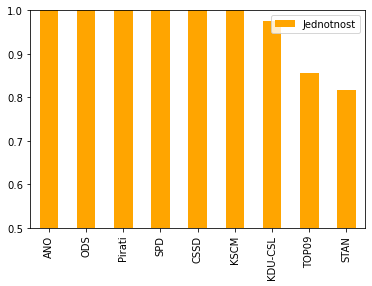

In [10]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Celkem']
framesNum = 1
result_data = {}
all_data = pd.read_csv('dist_votes.csv', engine = 'python', skiprows = 1, encoding='utf-8')

for i in range(6879):
    data = all_data.head(i * 12 + 10).tail(10)
#     mem_data = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas'])
#     mem_data = all_data.head(i * 200 + 200).tail(200)
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.drop(['Celkem'])
    data = data.astype('int32')
    data.insert(6, 'Jednotnost', 0)
    for party in data.index:
        if (data.loc[party, 'Ano'] + data.loc[party, 'Ne'] + data.loc[party, 'Zdrzel'] == 0):
            data.loc[party, 'Jednotnost'] = 1
        else:   
            x = data.loc[party, 'Ano'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne'] + data.loc[party, 'Zdrzel'])
            y = data.loc[party, 'Ne'] + data.loc[party, 'Zdrzel'] / (data.loc[party, 'Ano'] + data.loc[party, 'Ne'] + data.loc[party, 'Zdrzel'])
            if (x == 0 or y == 0):
                data.loc[party, 'Jednotnost'] = 1
            else:
                data.loc[party, 'Jednotnost'] = 1 - (-x * np.log2(x) - y * np.log2(y)) 
    if (i == 0):
        result_data = data.loc[:, ['Jednotnost']]
    else: 
        framesNum += 1
        result_data.loc[:, 'Jednotnost'] = (result_data.Jednotnost * (framesNum - 1) + data.Jednotnost) / framesNum

result_data.plot.bar(color = 'Orange')
plt.ylim(0.5, 1)

In [ ]:
Jednotlivé poslance, kteří se nejvíce shodují při svém hlasování 

In [17]:
result_data = pd.DataFrame(columns=['Dochazka', 'Pocet', 'Strana'])
all_data = pd.read_csv('members.csv', engine = 'python')
for i in range(6879):
    data = pd.DataFrame(columns = ['id_hlasovani','Jmeno', 'Strana', 'Hlas'])
    data = all_data.head(i * 200 + 200).tail(200)
    data.index = data.Jmeno
    data = data.drop(['Jmeno'], axis = 1)
    for member in data.index:
        if (data.loc[member, 'Hlas'] == 'A' or data.loc[member, 'Hlas'] == 'N' or data.loc[member, 'Hlas'] == 'Z'):
            attend = 1
        else:
            attend = 0
        if (member in result_data.index):
            result_data.loc[member, 'Pocet'] += 1
            number = result_data.loc[member, 'Pocet']
            result_data.loc[member, 'Dochazka'] = (result_data.loc[member, 'Dochazka'] * (number - 1) + attend) / number
        else:
            newRow = pd.Series({'Dochazka': attend, 'Pocet': 1, }, name=member)
            result_data = result_data.append(newRow)
        result_data.loc[member, 'Strana'] = data.loc[member, 'Strana']
        

In [13]:
result_data = result_data.sort_values(['Dochazka'])
size = len(result_data)
minm = 100
res = {}
for begin in range(size - 5):
    podobne = result_data.head(begin + 5).tail(5)
    average = podobne.Dochazka.mean()
    podobne.insert(2, 'Rozdil', 0)
    podobne.loc[:, 'Rozdil'] = (podobne.Dochazka - average) / 5
    if (podobne.Rozdil.sum() < minm):
        minm = podobne.Rozdil.sum()
        res = podobne.drop(['Pocet', 'Rozdil'], axis = 1)

display(res)

,Dochazka,Strana
Josef Kott,0.934147,ANO
Jaroslava Pokorná Jermanová,0.937500,ANO
Jan Chvojka,0.937782,ČSSD
Jaroslav Bžoch,0.939526,ANO
Lukáš Černohorský,0.939817,Piráti


In [ ]:
Vizualizace časového vývoje docházky

,ANO,ODS,Pirati,SPD,CSSD,KSCM,KDU-CSL,TOP09,STAN,Celkem
0,0.974359,0.960000,1.0,1.000000,1.0,0.933333,1.0,1.000000,1.0,0.980
1,0.987179,1.000000,1.0,1.000000,1.0,0.933333,1.0,1.000000,1.0,0.990
2,0.987179,1.000000,1.0,1.000000,1.0,0.933333,1.0,1.000000,1.0,0.990
3,1.000000,1.000000,1.0,1.000000,1.0,0.933333,1.0,1.000000,1.0,0.995
4,1.000000,1.000000,1.0,1.000000,1.0,0.933333,1.0,1.000000,1.0,0.995
...,...,...,...,...,...,...,...,...,...,...
6874,0.500000,0.478261,0.5,0.526316,0.5,0.533333,0.5,0.428571,0.5,0.500
6875,0.500000,0.478261,0.5,0.526316,0.5,0.533333,0.5,0.428571,0.5,0.500
6876,0.500000,0.478261,0.5,0.526316,0.5,0.533333,0.5,0.428571,0.5,0.500
6877,0.500000,0.478261,0.5,0.526316,0.5,0.533333,0.5,0.428571,0.5,0.500


<AxesSubplot:title={'center':'Vývoj docházky'}>

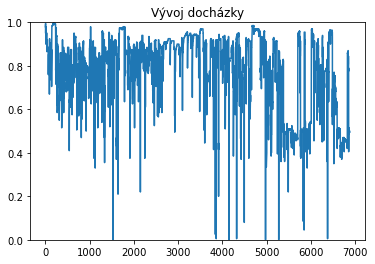

In [16]:
strany = ['ANO', 'ODS', 'Pirati', 'SPD', 'CSSD', 'KSCM', 'KDU-CSL', 'TOP09', 'STAN', 'Celkem']
num = 1
dataDoch = {}
all_data = pd.read_csv('dist_votes.csv', engine = 'python', skiprows = 1, encoding='utf-8')
result_data_time = pd.DataFrame(columns = strany)
for i in range(6879):
    data = all_data.head(i * 12 + 10).tail(10)
    data = data.drop(['Unnamed: 0'], axis = 1)
    data.index = strany
    data = data.astype('int32')
    data.insert(6, 'Dochazka', 0)
    data.loc[:, 'Dochazka'] =  1 -((data.Omluven + data.Neprihlasen) / data.Poslancu)
    result_data_time = result_data_time.append(data.Dochazka, ignore_index = 'True')

display(result_data_time)
plt.ylim(0, 1)
plt.title('Vývoj docházky')
result_data_time.Celkem.plot()
